In [1376]:
import pandas as pd
import numpy as np
import seaborn as sns 
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
import shap
import lime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


## Weather Prediction Project
This project aims to predict whether it will rain tomorrow based on historical weather data. Using a dataset with various meteorological features such as temperature, humidity, wind conditions, and cloud cover, a machine learning model is developed to forecast rainfall. The project involves data preprocessing, feature selection, and model training to achieve accurate predictions. Models such as logistic regression, decision trees, and random forests are explored, with performance evaluated through metrics like accuracy, precision, and recall. The goal is to provide a reliable, data-driven tool for weather forecasting.

## 1. Data input

### 1.1 Reading data from a file

In [1377]:
data = pd.DataFrame()
data = pd.read_csv("weather.csv")

data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,E,20.0,...,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,ESE,19.0,...,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,E,11.0,...,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,8.8,19.5,0.0,4.0,4.1,S,48.0,E,ENE,19.0,...,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,8.4,22.8,16.2,5.4,7.7,E,31.0,S,ESE,7.0,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


### 1.1 Data description

In [1378]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


## 2. Data cleaning
### 2.1 Type checking

In [1379]:
data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

### 2.2 Conversion to numerical values
We can see, that some of the columns are of type **object** **(String)**, however we want all our columns to be numercial.

In [1380]:
object_columns = data.select_dtypes(include='object').columns
data[object_columns].head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,NW,SW,NW,No,Yes
1,ENE,E,W,Yes,Yes
2,NW,N,NNE,Yes,Yes
3,NW,WNW,W,Yes,Yes
4,SSE,SSE,ESE,Yes,No


First three columns contain types of *wind directions* ***(altogether 16 possible types)*** and columns containing information about ***rain***
are of type *boolean* (yes or no).

We can create conversion mappings for those columns.

In [1381]:
wind_to_float_mapping = {"N": 0.0, "NNE": 22.5, "NE": 45.0, "ENE" : 67.5, 
                         "E":90.0, "ESE" : 115.5, "SE":135.0, "SSE" : 157.5, 
                         "S":180.0, "SSW": 202.5, "SW": 225.0, "WSW":247.5, 
                         "W":270, "WNW": 292.5, "NW": 315.0, "NNW": 337.5 }

bool_to_float_mapping = {'Yes':1, 'No':0}


### 2.3 Wind columns

We can filter out *wind related* columns and apply mapping to degrees, where **N = 0°, S = 180°, SE = 135°,  NNE = 22.5°, etc.**

In [1382]:
wind_dir_columns = data[object_columns].filter(like='Wind').columns
data[wind_dir_columns] = data[wind_dir_columns].replace(wind_to_float_mapping)
data[wind_dir_columns].head()

,WindGustDir,WindDir9am,WindDir3pm
0,315.0,225.0,315.0
1,67.5,90.0,270.0
2,315.0,0.0,22.5
3,315.0,292.5,270.0
4,157.5,157.5,115.5


In [1383]:
data[wind_dir_columns].dtypes

WindGustDir    float64
WindDir9am     float64
WindDir3pm     float64
dtype: object

### 2.4 Yes or No columns

We can select **Rain related** columns the same way and also apply mapping, after successfully converting **wind related** ones

In [1384]:
yes_or_no_columns = data.filter(like="Rain").columns
data[yes_or_no_columns] = data[yes_or_no_columns].replace(bool_to_float_mapping)

### 2.5 Checking if all datatypes are numerical

In [1385]:
data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RISK_MM          float64
RainTomorrow       int64
dtype: object

### 2.6 Checking for duplicates

In [1386]:
data.duplicated().sum()

0

### 2.7 Checking for N/A values

In [1387]:
data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

### 2.8 Replacing N/As with the **median** of a given column

In [1388]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].median())

data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

### 2.8.1 Dropping rows with any N/As present is also a possible solution

In [1389]:
# data = data.dropna()

## 3. Building a correlation matrix

This ***22x22*** matrix allows us to determine columns, that have the ***highest correlation*** (have the most impact) on a result column **("RainTommorow)**

In [1390]:
corr_matrix = data.corr()

<Axes: >

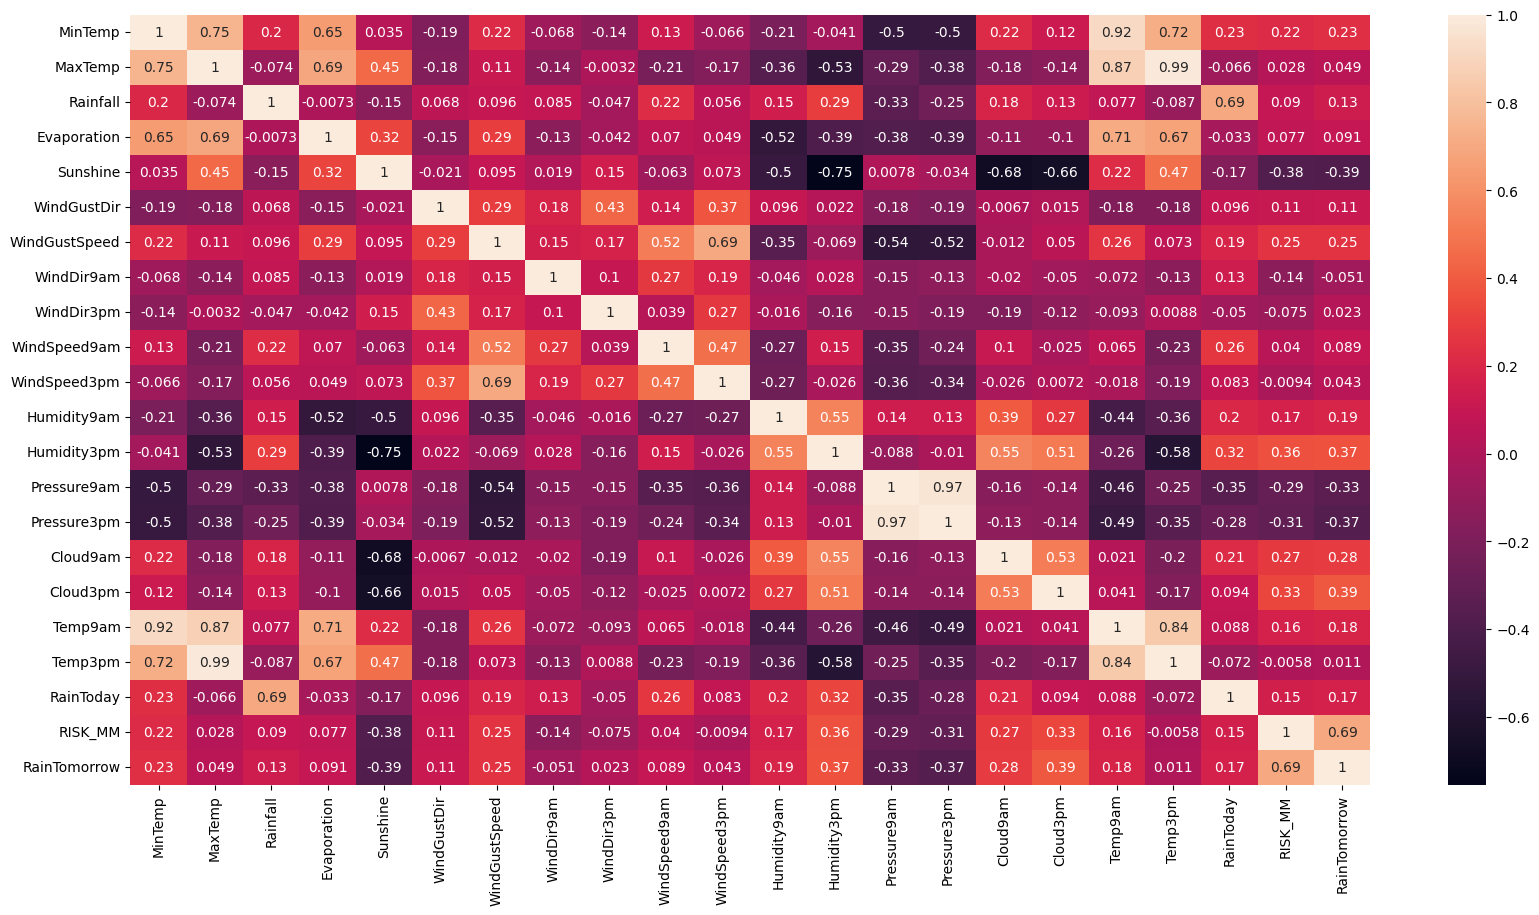

In [1391]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True)

### 3.1 Correlation for RainTomorrow collumn 

In [1392]:
corr_list = corr_matrix["RainTomorrow"].abs().sort_values(ascending=False)
corr_list

RainTomorrow     1.000000
RISK_MM          0.693024
Cloud3pm         0.388020
Sunshine         0.385382
Pressure3pm      0.370247
Humidity3pm      0.366882
Pressure9am      0.330047
Cloud9am         0.284579
WindGustSpeed    0.249608
MinTemp          0.233213
Humidity9am      0.185077
Temp9am          0.182170
RainToday        0.168182
Rainfall         0.133586
WindGustDir      0.114063
Evaporation      0.090528
WindSpeed9am     0.088758
WindDir9am       0.050855
MaxTemp          0.049228
WindSpeed3pm     0.042505
WindDir3pm       0.022940
Temp3pm          0.011105
Name: RainTomorrow, dtype: float64

We should delete the ***RainTomorrow*** column from the list, as it's correlation to itself is trivially equal to ***1.0***

We can then select ***five most impotant columns*** for the next stages

In [1393]:
corr_list.pop("RainTomorrow")
important_columns = corr_list[0:5].index
important_columns

Index(['RISK_MM', 'Cloud3pm', 'Sunshine', 'Pressure3pm', 'Humidity3pm'], dtype='object')

## 4. Data visualization

### 4.1 Rain depending on various parameteres, such as temperature, evaporation, sunshine, etc.
Blue dots - ***no rain***, orange dots - ***rain***

<Figure size 2000x1000 with 0 Axes>

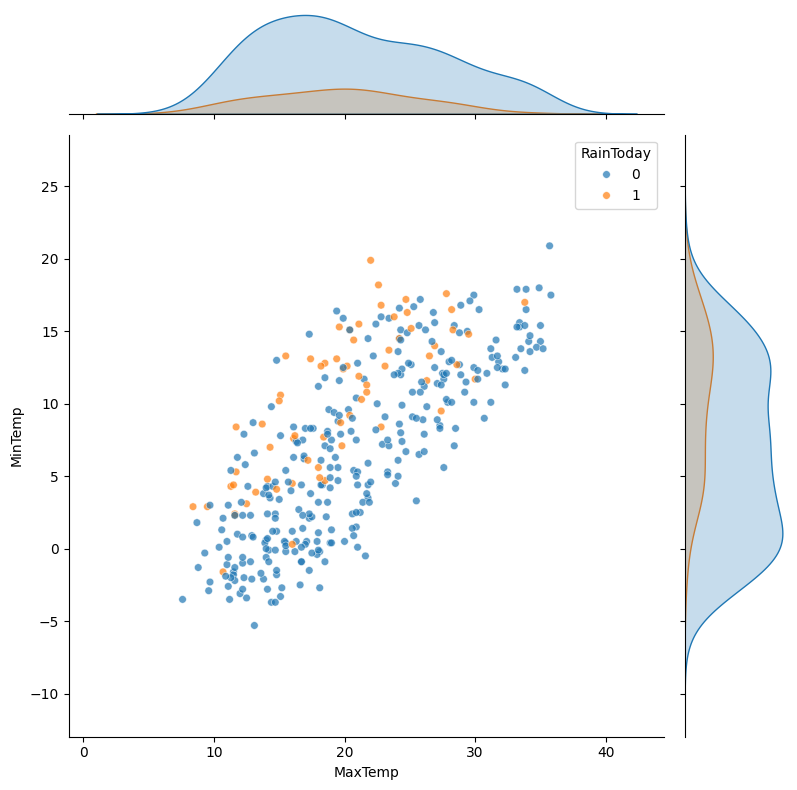

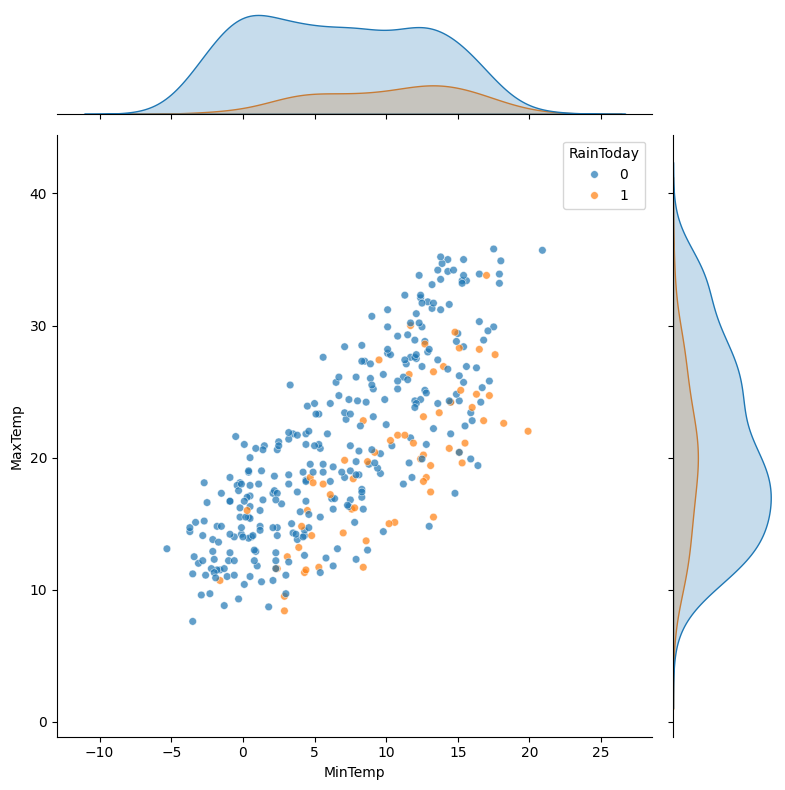

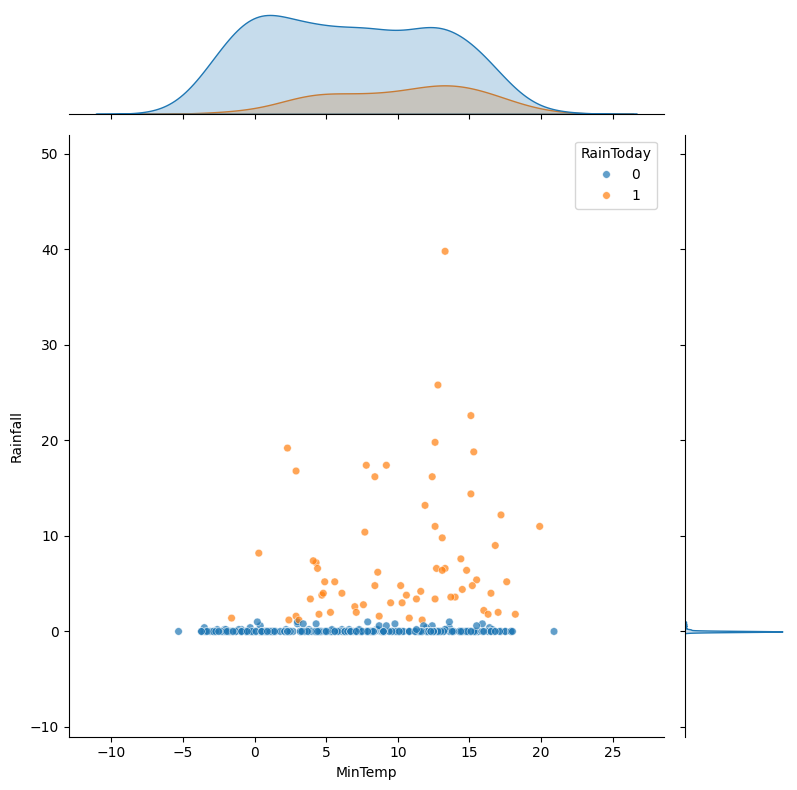

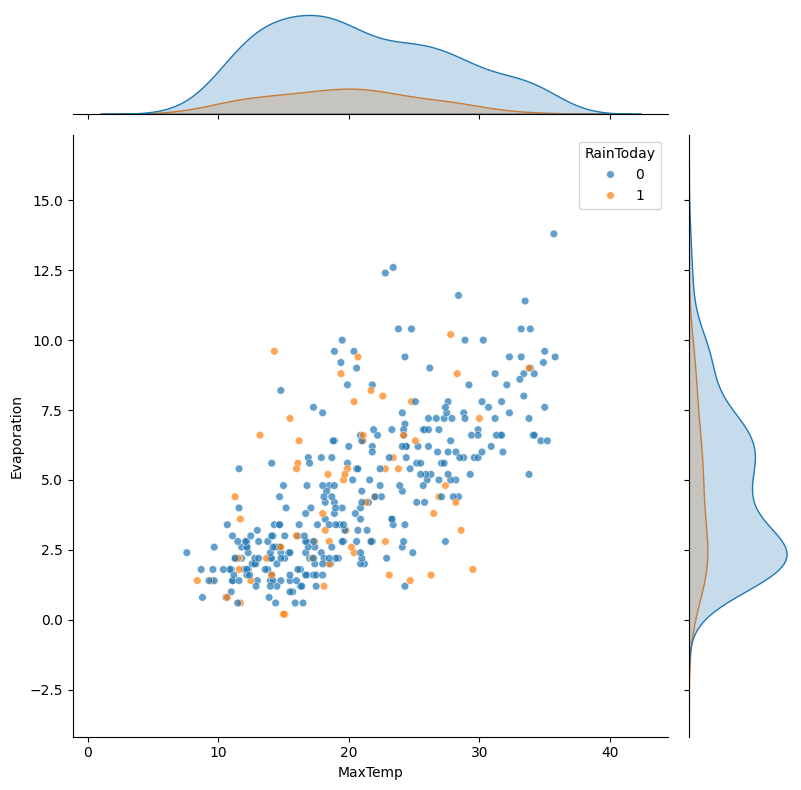

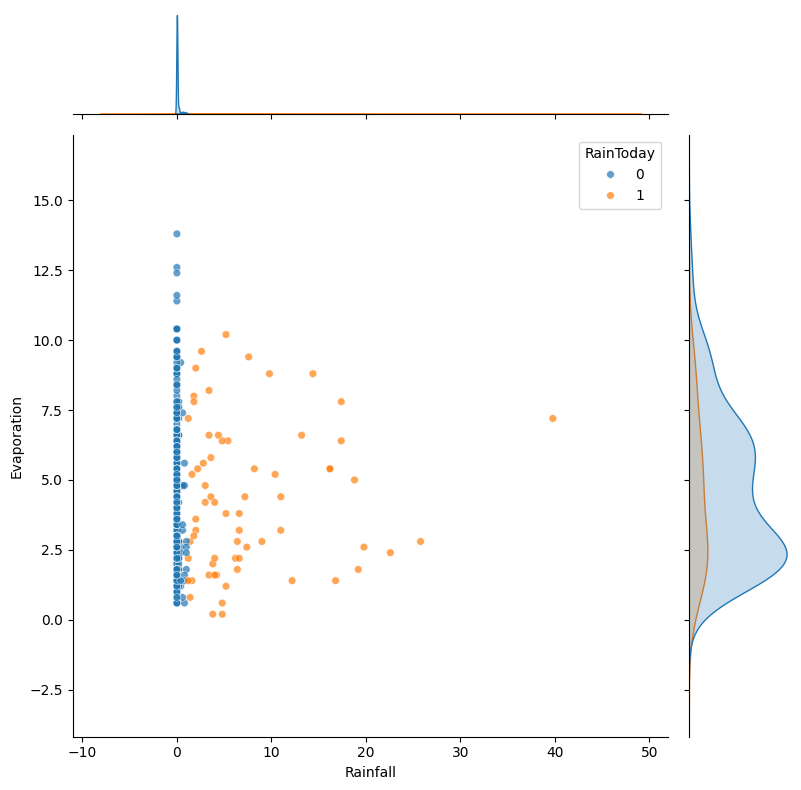

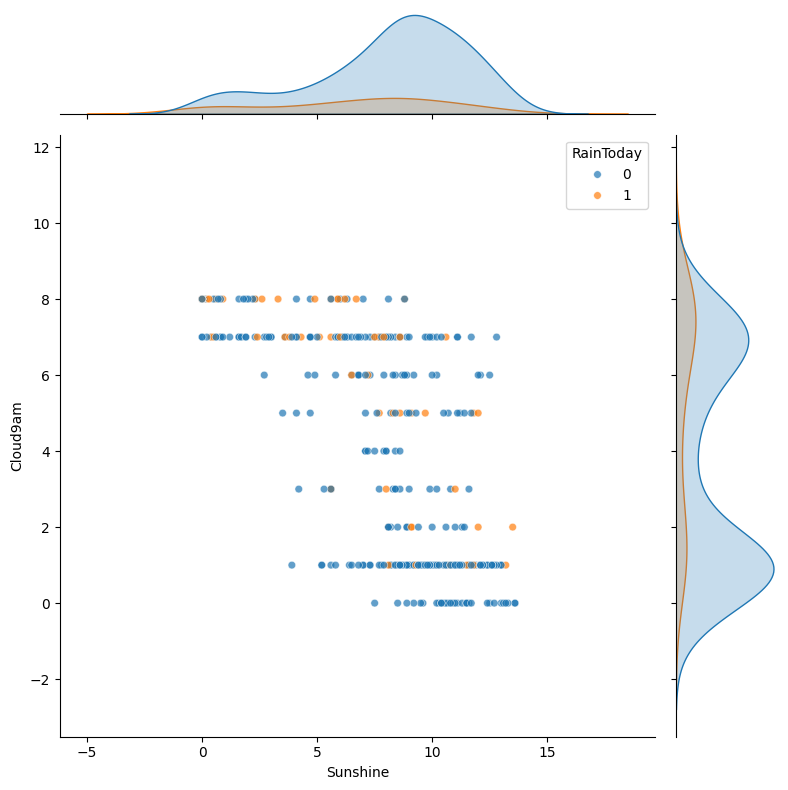

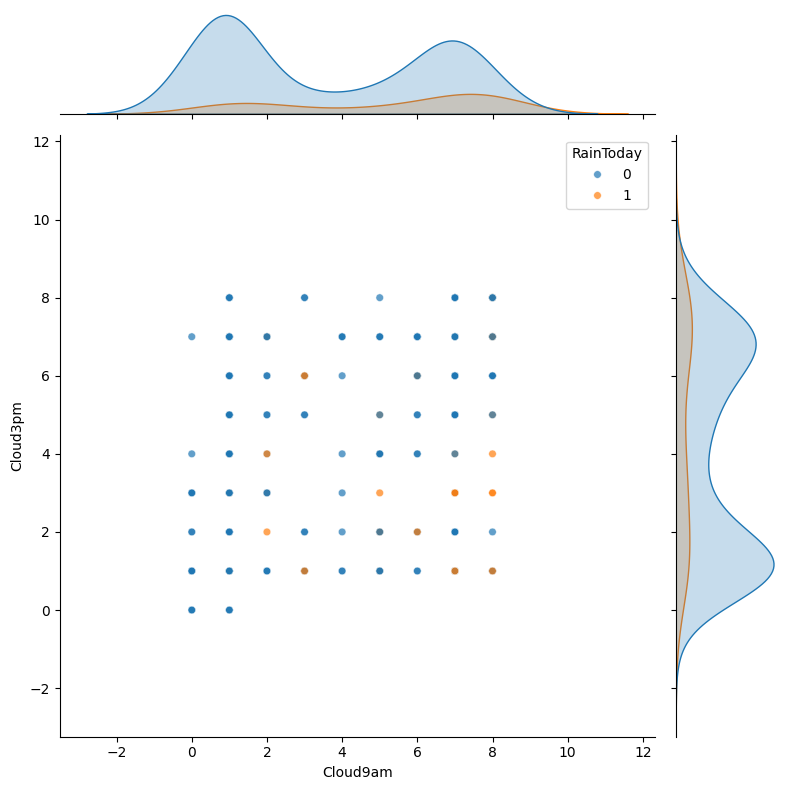

In [1394]:
plt.figure(figsize=(20,10))
sns.jointplot(data=data, x="MaxTemp", y="MinTemp", hue="RainToday",height=8,s=30,alpha=0.7)
sns.jointplot(data=data, x="MinTemp", y="MaxTemp", hue="RainToday",height=8,s=30,alpha=0.7, )
sns.jointplot(data=data, x="MinTemp", y="Rainfall", hue="RainToday",height=8,s=30,alpha=0.7)
sns.jointplot(data=data, x="MaxTemp", y="Evaporation", hue="RainToday",height=8,s=30,alpha=0.7)
sns.jointplot(data=data, x="Rainfall", y="Evaporation", hue="RainToday",height=8,s=30,alpha=0.7)
sns.jointplot(data=data, x="Sunshine", y="Cloud9am", hue="RainToday",height=8,s=30,alpha=0.7)
sns.jointplot(data=data, x="Cloud9am", y="Cloud3pm", hue="RainToday",height=8,s=30,alpha=0.7)

## 5. Preparing learning models

### 5.1 'RISK_MM' Column

In [1395]:
print(important_columns)

Index(['RISK_MM', 'Cloud3pm', 'Sunshine', 'Pressure3pm', 'Humidity3pm'], dtype='object')


From the list of ***important columns***, we can see, that **'RISK_MM'** is heavily corelated to **'RainTomorrow'**, which is not really a surprise, while **'RISK_MM'** describes the predicted amount of rainfall tomorrow. In case it's more than 0 - rain tomorrow is obviously more likely. 

**DecisionTreeClassifier()** clearly indicates, that this column alone heavily influences estimator's behaviour.

In [1396]:
X = data.drop(['RainTomorrow'], axis=1)  
y = data['RainTomorrow']               

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree1 = DecisionTreeClassifier()
tree1.fit(X_train, y_train)
y_pred = tree1.predict(X_test)
accuracy_score(y_pred, y_test)

1.0

### This model's accuracy is equal to **1**, which is a little suspicious

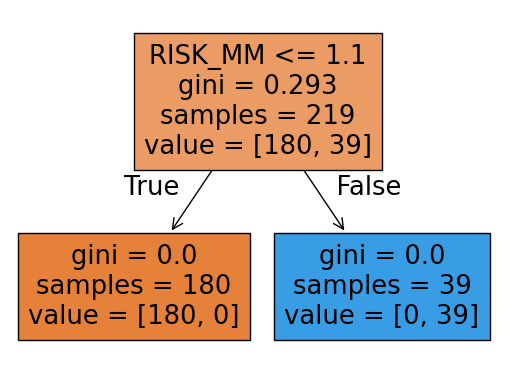

In [1397]:
plot_tree(tree1, filled=True, feature_names=X_train.columns)
plt.show()

We can see, that algorithm ***only*** takes into consideration this parameter, however the goal of our experiment is to not use other predictions, but rather create our own.

#### So we should delete this column from the dataset

In [1398]:
corr_list.pop("RISK_MM")
important_columns = corr_list[0:5].index
important_columns

Index(['Cloud3pm', 'Sunshine', 'Pressure3pm', 'Humidity3pm', 'Pressure9am'], dtype='object')

### 5.2 Building the model

As a part of this experiment, we are going to train our models on the whole dataset, as well as columns, we determined as 'important' (columns with the highest correlation to **'RainTomorrow'**) 

In [1399]:
### Training data on all columns
X = data.drop(['RainTomorrow', 'RISK_MM'], axis=1)  
### Training data on 5 columns with the highest correlation to y
X_important = data[important_columns]     
### Result column
y = data['RainTomorrow']                  

### 5.3 Splitting the dataset: 80% - training, 20% - testing

In [1400]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [1401]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split (
    X_important, y, test_size=0.2, random_state=42)

### 5.4 Scaling both datasets

In [1402]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler1 = StandardScaler()
scaler1.fit(X_train_imp)

X_train_scaled_imp = scaler1.transform(X_train_imp)
X_test_scaled_imp = scaler1.transform(X_test_imp)


## 6. Classifiers

### 6.1 Logistic Regression

In [1403]:
lr = LogisticRegression(max_iter=1000, solver='lbfgs')
lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [1404]:
y_pred = lr.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, y_pred)
lr_acc

0.8378378378378378

In [1405]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90        58
           1       0.75      0.38      0.50        16

    accuracy                           0.84        74
   macro avg       0.80      0.67      0.70        74
weighted avg       0.83      0.84      0.82        74



### 6.2 K-Nearest Neighbors

Iterating through different amount of neighbors allows us to find the optimal ***n_neighbors*** parameter, at the same time avoiding overfitting

In [1406]:
knn_models = {}

for i in range(3, 101):
    knn_models[f'knn_{i}'] = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, y_train)

In [1407]:
scores = [()]
for knn in knn_models:
    y_pred = knn_models[knn].predict(X_test_scaled)
    scores.append((accuracy_score(y_test, y_pred), knn))

print(max(scores)[1])
knn_best = knn_models[max(scores)[1]]


knn_9


In [1408]:
y_pred_best = knn_best.predict(X_test_scaled)

knn_acc = accuracy_score(y_test, y_pred_best)
knn_acc

0.8243243243243243

In [1409]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        58
           1       1.00      0.19      0.32        16

    accuracy                           0.82        74
   macro avg       0.91      0.59      0.61        74
weighted avg       0.86      0.82      0.77        74



### 6.3 Decision Tree Classifier

In [1410]:
tree = DecisionTreeClassifier(
    max_depth=None,            # No limit on tree depth (let it grow fully)
    min_samples_split=5,       # Default value, but you can increase it if needed
    min_samples_leaf=5,        # Default value, reduce to consider more splits
    max_features=None          # Use all features when splitting a node
)
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5)

In [1411]:
y_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred)
tree_acc

0.7297297297297297

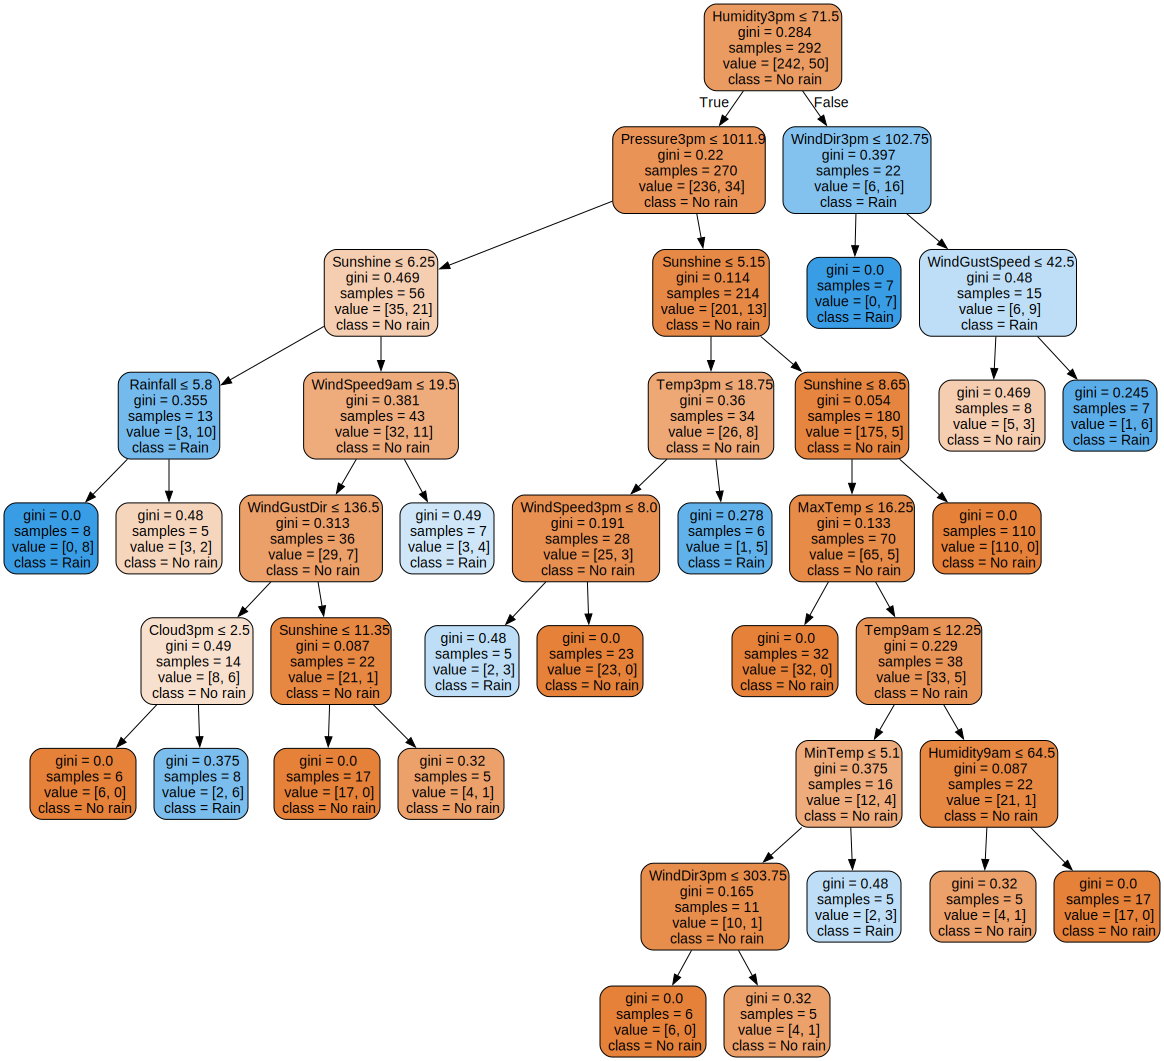

In [1412]:
from sklearn.tree import export_graphviz
import graphviz

classes = ['No rain', "Rain"]
dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns,
    class_names=classes, 
    filled=True, 
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree") 

graph

### 6.4 Random Forest Classifier

In [1413]:
forest = RandomForestClassifier( 
    max_depth=None,            
    min_samples_split=5,       
    min_samples_leaf=5,        
    max_features=None          
)
forest.fit(X_train, y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=5,
                       min_samples_split=5)

In [1414]:
y_pred = forest.predict(X_test)
forest_acc = accuracy_score(y_pred, y_test)
forest_acc

0.8243243243243243

### 6.5 We can create so called *'ensemble'* of classifiers, choosing 'soft' voting method (majority of classifiers decides about the output)

In [1415]:
voting_classifier = VotingClassifier(
    estimators=[('tree', tree),  ('knn', knn_best), ('lr', lr), ('rf', forest)],  
    voting='soft'
)

In [1416]:
voting_classifier.fit(X_train_scaled, y_train)
y_pred = voting_classifier.predict(X_test_scaled)

voting_acc = accuracy_score(y_pred, y_test)
voting_acc

0.8648648648648649

In [1417]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        58
           1       1.00      0.38      0.55        16

    accuracy                           0.86        74
   macro avg       0.93      0.69      0.73        74
weighted avg       0.88      0.86      0.84        74



## 7. Neural network

In [1418]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

early_stopping = EarlyStopping(
    monitor='accuracy',        # Monitor validation loss
    patience=10,               # Stop training after 10 epochs with no improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.1, callbacks=early_stopping,) 
network_loss, network_acc = model.evaluate(X_test_scaled, y_test)
model

print(f"Test Accuracy: {network_acc}")

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5012 - loss: 0.7034 - val_accuracy: 0.8667 - val_loss: 0.5036
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.4850 - val_accuracy: 0.8667 - val_loss: 0.4049
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8695 - loss: 0.3654 - val_accuracy: 0.8667 - val_loss: 0.3643
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8377 - loss: 0.3844 - val_accuracy: 0.8667 - val_loss: 0.3474
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.2950 - val_accuracy: 0.8667 - val_loss: 0.3431
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8948 - loss: 0.2936 - val_accuracy: 0.8667 - val_loss: 0.3373
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8881 - loss: 0.2589 - val_accuracy: 0.8667 - val_loss: 0.3380
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9053 - loss: 0.2500 - val_accuracy: 0.8667 - val_loss:

## 8. Results

### 8.1 Acuracies of all previously tested classifiers


In [1419]:
accuracies = [lr_acc, knn_acc, tree_acc, forest_acc, voting_acc, network_acc]
accuracies
    

[0.8378378378378378,
 0.8243243243243243,
 0.7297297297297297,
 0.8243243243243243,
 0.8648648648648649,
 0.8648648858070374]

### 8.2 All atributes vs 'Important' atributes

We're iterating through all previously used classifiers as well as two datasets, creating a Data Frame for comparing different statistical parameters 

In [1420]:
classifiers = {
    'Random Forest': forest,
    'Logistic Regression': lr,
    'K-Nearest Neighbors   ': knn_best,
    'Decision Tree': tree,
    'Voting Classifier' : voting_classifier
}

datasets = {
    'All atributes': (X_train_scaled, X_test_scaled, y_train, y_test),
    '\'Important atributes\'': (X_train_scaled_imp, X_test_scaled_imp, y_train_imp, y_test_imp)
}

feature_columns = {'All atributes' : X.columns,  '\'Important atributes\'': X_train_imp.columns}

def create_neural_network(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

results = []

for dataset_name, (X_train_1, X_test_1, y_train_1, y_test_1) in datasets.items():
    input_shape = X_train_1.shape[1]  
    for clf_name, clf in classifiers.items():
        
        clf.fit(X_train_1, y_train_1)
        y_pred_1 = clf.predict(X_test_1)
        
        accuracy = accuracy_score(y_test_1, y_pred_1)
        precision = precision_score(y_test_1, y_pred_1)
        recall = recall_score(y_test_1, y_pred_1)
        f1 = f1_score(y_test_1, y_pred_1)
        
        results.append({
            'Dataset': dataset_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })
    

    nn_model = create_neural_network(input_shape)

    early_stopping = EarlyStopping(
        monitor='accuracy',     
        patience=10,             
        restore_best_weights=True  
        )
    
    nn_model.fit(X_train_1, y_train_1, epochs=50, batch_size=16, verbose=0, validation_split=0.1, callbacks=early_stopping)
    
    y_pred_nn = (nn_model.predict(X_test_1) > 0.5).astype("int32") 
    accuracy_nn = accuracy_score(y_test_1, y_pred_nn)
    precision_nn = precision_score(y_test_1, y_pred_nn)
    recall_nn = recall_score(y_test_1, y_pred_nn)
    f1_nn = f1_score(y_test_1, y_pred_nn)
    
    results.append({
        'Dataset': dataset_name,
        'Classifier': 'Neural Network',
        'Accuracy': accuracy_nn,
        'Precision': precision_nn,
        'Recall': recall_nn,
        'F1-Score': f1_nn
    })

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


### 8.3 Created Data Frame

In [1421]:
results_df = pd.DataFrame(results)
results_df.sort_values(['Classifier'], inplace=True)
results_df

,Dataset,Classifier,Accuracy,Precision,Recall,F1-Score
3,All atributes,Decision Tree,0.729730,0.400000,0.5000,0.444444
9,'Important atributes',Decision Tree,0.783784,0.500000,0.2500,0.333333
2,All atributes,K-Nearest Neighbors,0.824324,1.000000,0.1875,0.315789
8,'Important atributes',K-Nearest Neighbors,0.810811,0.625000,0.3125,0.416667
1,All atributes,Logistic Regression,0.837838,0.750000,0.3750,0.500000
7,'Important atributes',Logistic Regression,0.851351,0.857143,0.3750,0.521739
5,All atributes,Neural Network,0.851351,0.692308,0.5625,0.620690
11,'Important atributes',Neural Network,0.851351,0.857143,0.3750,0.521739
0,All atributes,Random Forest,0.824324,0.714286,0.3125,0.434783
6,'Important atributes',Random Forest,0.837838,0.750000,0.3750,0.500000


### 8.4 Data visualization

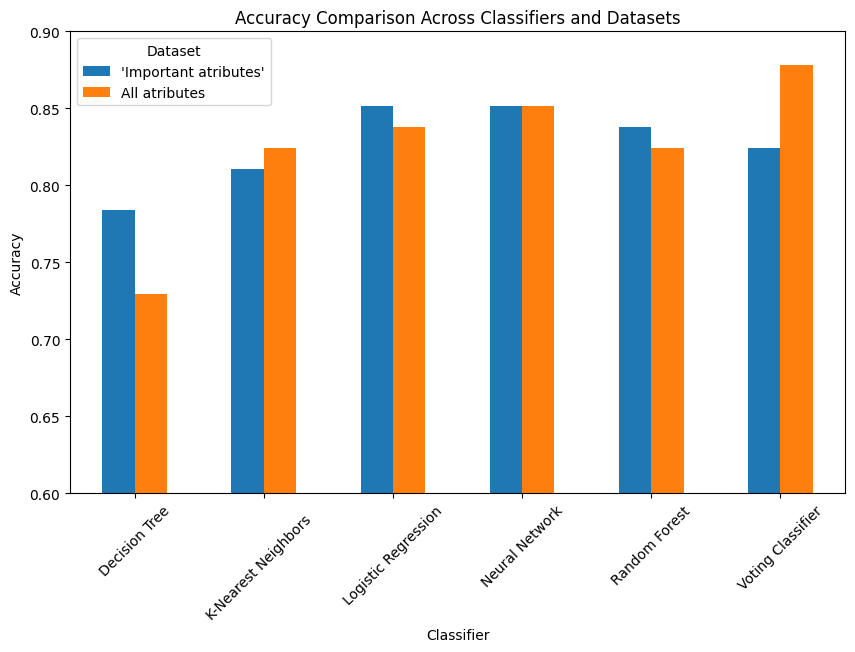

In [1422]:
results_df.pivot(index='Classifier', columns='Dataset', values='Accuracy').plot(kind='bar', figsize=(10, 6))
plt.title('Accuracy Comparison Across Classifiers and Datasets')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.6, 0.9)
plt.show()


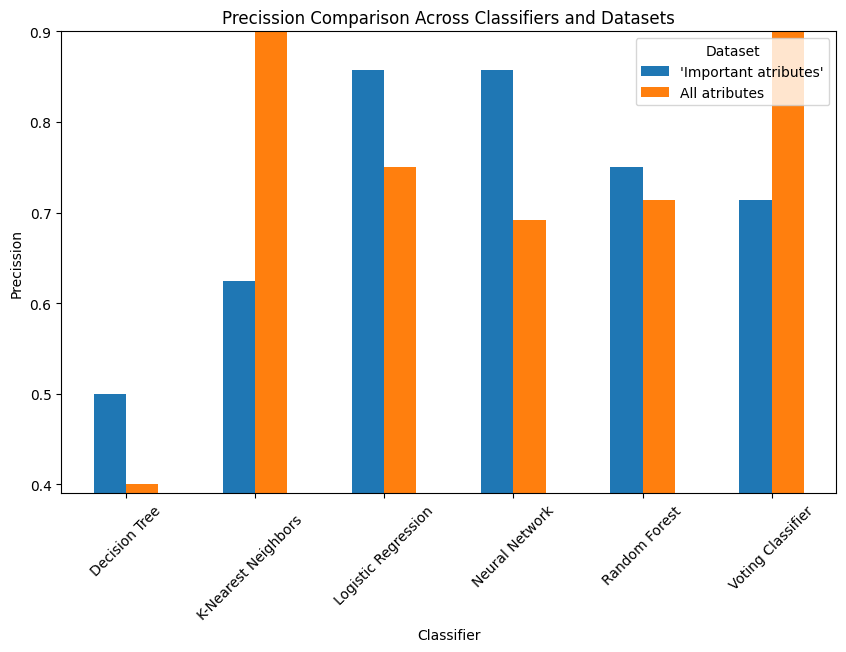

In [1423]:
results_df.pivot(index='Classifier', columns='Dataset', values='Precision').plot(kind='bar', figsize=(10, 6))
plt.title('Precission Comparison Across Classifiers and Datasets')
plt.ylabel('Precission')
plt.xticks(rotation=45)
plt.ylim(0.39, 0.9)
plt.show()


## 9. Explainable AI Elements


**Explainable AI (XAI)** helps users understand and trust machine learning models by making their decisions transparent. XAI is essential for improving model transparency, accountability, trust, and fairness, especially when working with complex "black box" models like deep neural networks.

---

### LIME (Local Interpretable Model-Agnostic Explanations)

**LIME** explains individual predictions of any model by approximating the complex model locally with a simpler, interpretable model (like linear regression). It perturbs the input data, observes how the model's prediction changes, and builds a linear model to explain the influence of each feature on that specific prediction.

- **Advantages**: Simple, model-agnostic, provides local explanations for individual predictions.
- **Limitations**: Provides only local approximations, and results can vary depending on the data perturbations.

---

### SHAP (SHapley Additive exPlanations)

**SHAP** is based on Shapley values from game theory and fairly attributes the contribution of each feature to a model's prediction. It provides both global and local explanations by showing how much each feature impacts the prediction, using a solid theoretical foundation.

- **Advantages**: Provides consistent, globally interpretable feature importance. Handles feature interactions well.
- **Limitations**: Computationally expensive, especially for large models and datasets.

---

### LIME vs. SHAP

- **LIME**: Quick, local, and easy-to-interpret but only provides approximations.
- **SHAP**: More theoretically sound, offers both global and local explanations, but can be computationally heavy.



### 9.1 LIME Explanation

In [1424]:
datasets1 = {
    'All atributes': (X_train, X_test, y_train, y_test),
    '\'Important atributes\'': (X_train_imp, X_test_imp, y_train_imp, y_test_imp)
}

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step


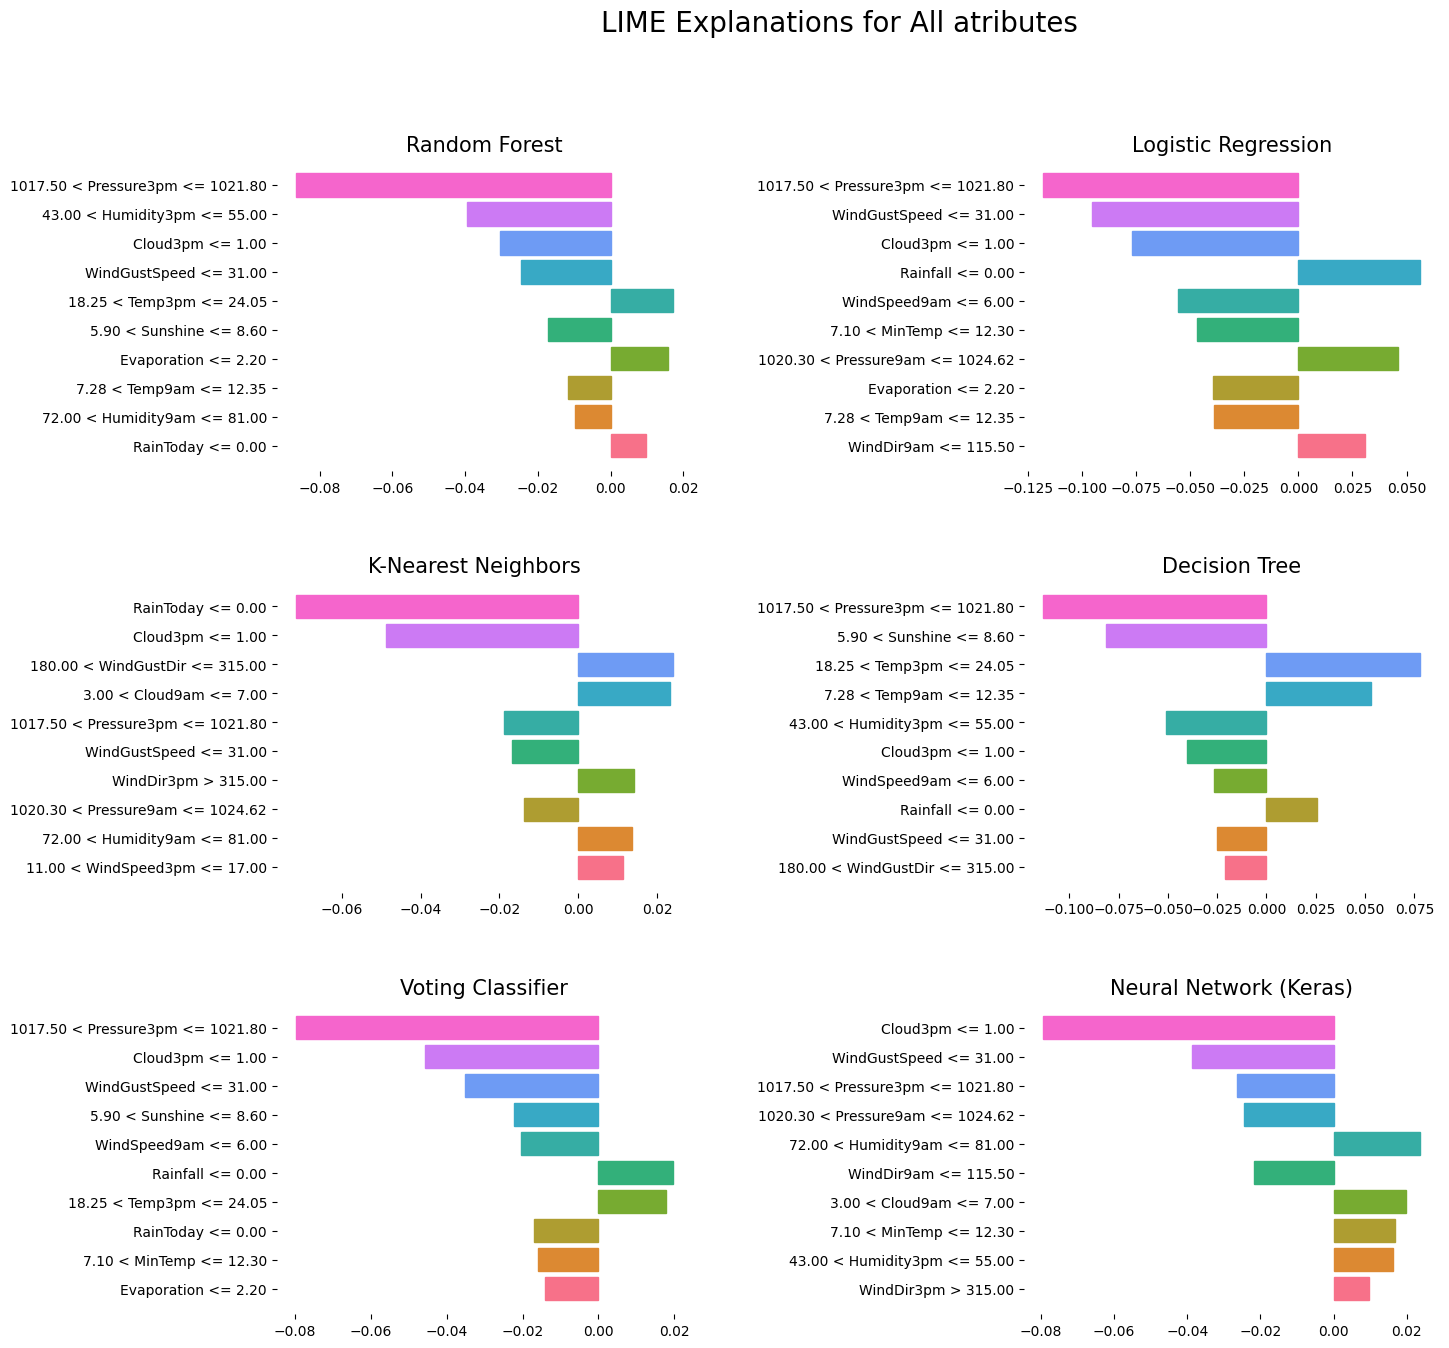

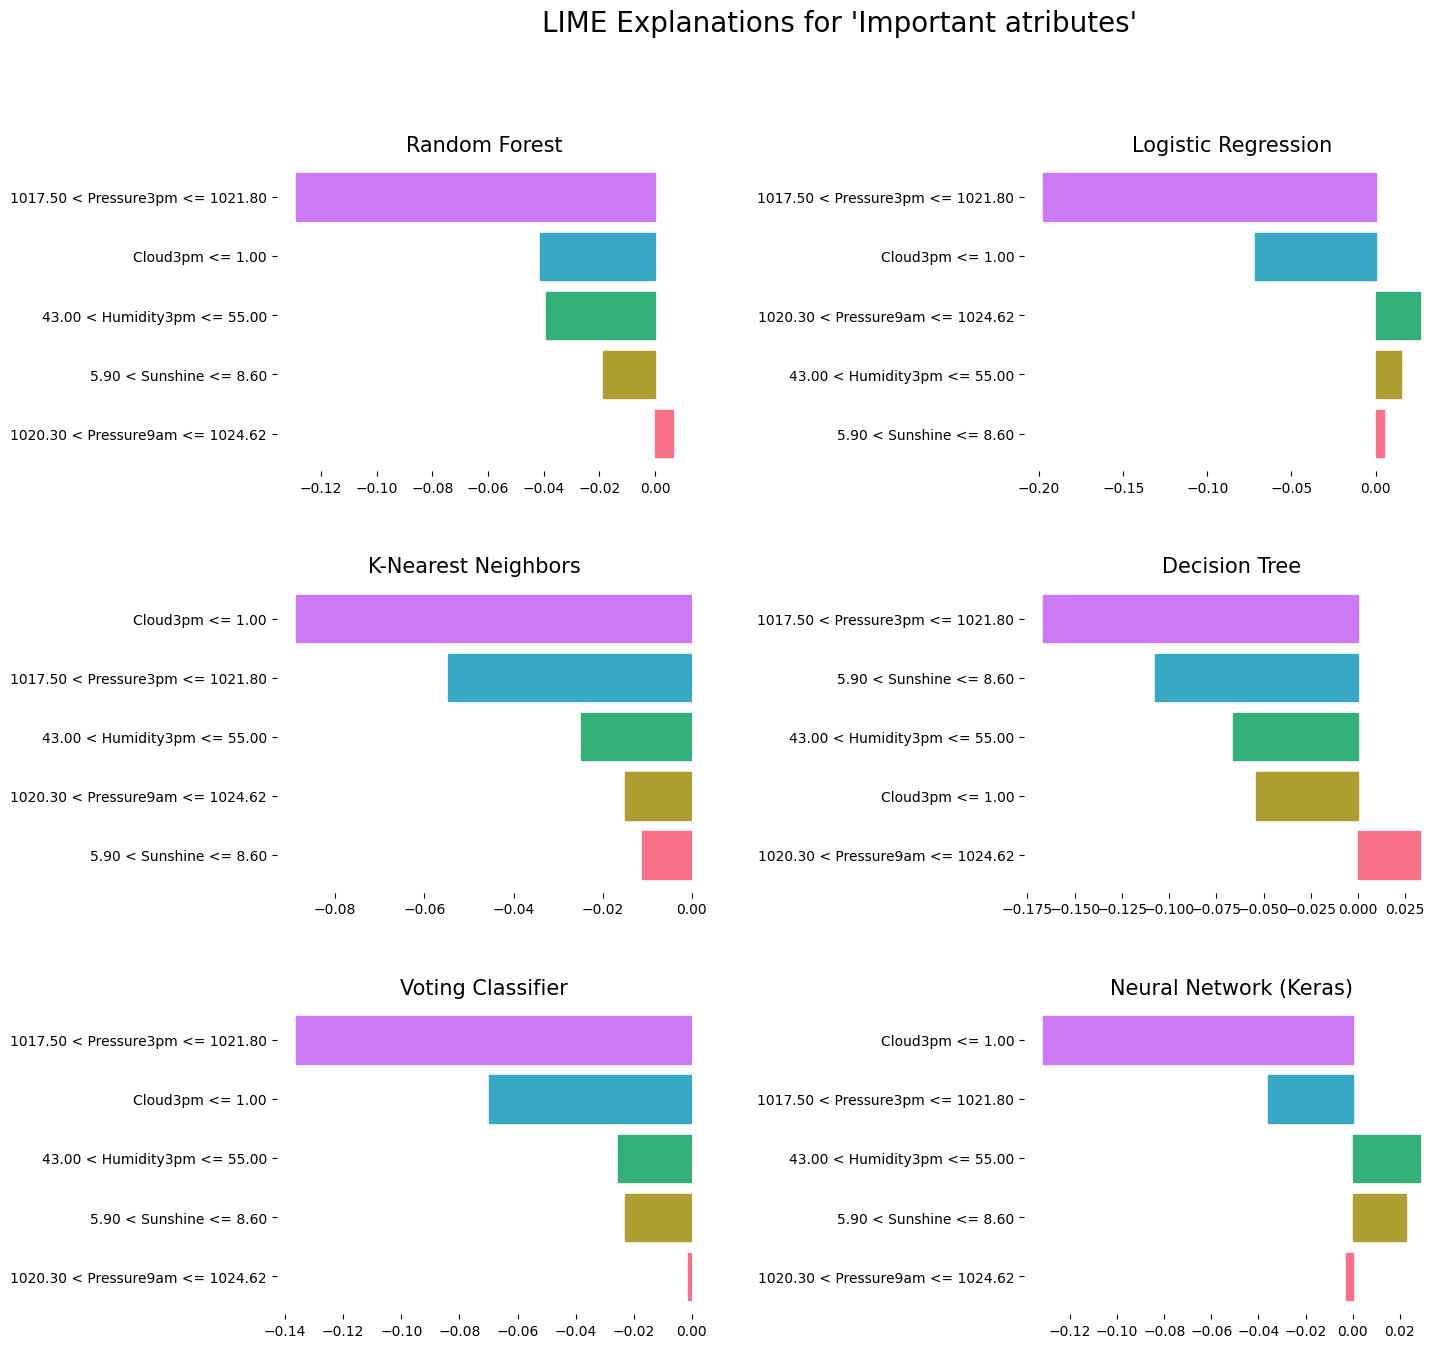

In [1425]:
def plot_lime_exp(fig, fig_index, exp_data, title):
    exp_data = dict(sorted(exp_data.items(), key=lambda item: abs(item[1]), reverse=True))
    
    features = list(exp_data.keys())[::-1]  
    explanations = list(exp_data.values())[::-1]  

    ax = fig.add_subplot(fig_index)  
    lime_bar = ax.barh(features, explanations)  
    ax.set_title(title, fontsize=15)

    color_list = sns.color_palette("husl", len(exp_data))  
    for i, bar in enumerate(lime_bar):
        bar.set_color(color_list[i % len(color_list)])  

    ax.set_facecolor('white')
    plt.box(False)


for dataset_name, (X_train, X_test, y_train, y_test) in datasets1.items():
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    input_shape = X_train_scaled.shape[1]
    keras_model = create_neural_network(input_shape)

    keras_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

    def keras_predict_proba(X_unscaled):
        X_scaled = scaler.transform(X_unscaled) 
        pred = keras_model.predict(X_scaled)  
        return np.hstack([1 - pred, pred]) 

    classifiers['Neural Network (Keras)'] = keras_predict_proba

    fig = plt.figure(figsize=(15, 15))
    plt.suptitle(f"LIME Explanations for {dataset_name}", fontsize=20)  
    
    instance = X_test.iloc[0].values.reshape(1, -1)  
  
    for idx, (name, clf) in enumerate(classifiers.items(), start=1):
        if name == 'Neural Network (Keras)':  
            predict_fn = keras_predict_proba 
        else:
            clf.fit(X_train_scaled, y_train)  
            predict_fn = lambda X: clf.predict_proba(scaler.transform(X))  

        X_train_np = X_train.values  
        
        explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=X_train_np,  
            feature_names=feature_columns[dataset_name],
            class_names=['No Rain', 'Rain'],
            mode='classification'
        )
    
        exp = explainer.explain_instance(
            data_row=instance[0],  
            predict_fn=predict_fn
        )
        
       
        exp_data = dict(exp.as_list())
        plt.subplots_adjust(wspace=0.8, hspace=0.35)

        plot_lime_exp(fig, 320 + idx, exp_data, f"{name}")



plt.show()


## Value interpretation for LIME

Numerical value represents each feature's importance for overall classification for each model. If the value is positive - it increases the likelihood of rain, if negative - decreases it.

### For example:
**Pressure3pm - 1017.5 < Pressure <= 1021.8** - pressure in this range decreases the probability of rain more significantly, than other parameters

**Humidity9am - 72 < Humidity <= 81** - humidity in this relatively high range increases the probability of rain more significantly, than other parameters

  0%|          | 0/74 [00:00<?, ?it/s]

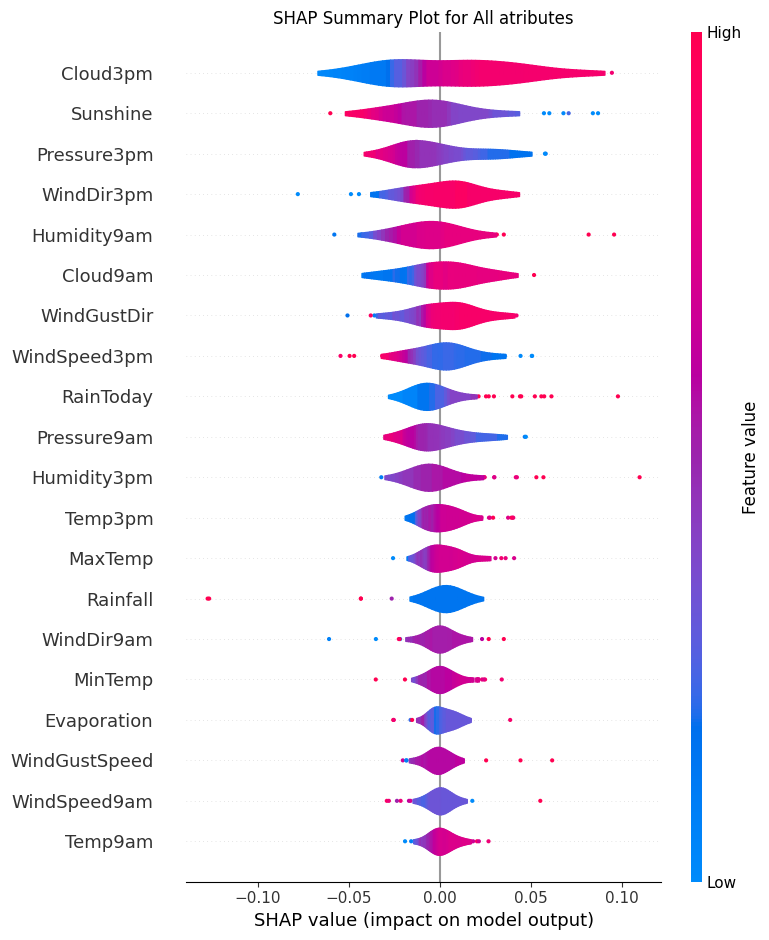

  0%|          | 0/74 [00:00<?, ?it/s]

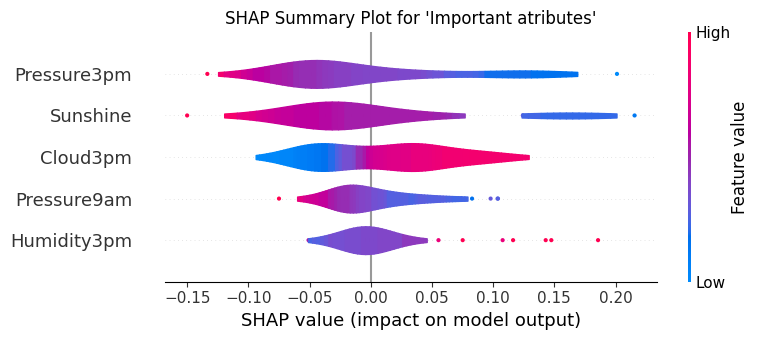

In [1434]:
for dataset_name, (X_train_scaled, X_test_scaled, y_train, y_test) in datasets.items():
    knn_best.fit(X_train_scaled, y_train)
    
    background = shap.kmeans(X_train_scaled, 100) 
    explainer = shap.KernelExplainer(knn_best.predict_proba, background)
    
    shap_values = explainer.shap_values(X_test_scaled)
    
    plt.figure()
    plt.title(f"SHAP Summary Plot for {dataset_name}")
    shap.summary_plot(shap_values[:, :, 1], X_test_scaled,   feature_names=feature_columns[dataset_name], plot_type='violin')
    plt.show()



## Value interpretation for SHAP
On x-axis every single value is represneted. It has three main parameteres:
- ***How far*** the value is on the axis represents how ***strongly*** it influences the outcome
- If the value is ***positive*** - probability of **rain is increased**, if ***negative*** - **decreased**
- ***Colour*** represents if the value is **high or low** (relative to it's ***median*** value)
### For example:

For **Pressure** at 3pm
- The majority of points is on the left side of the plot, so it's rather not causing *rain*
- The further to the left side - the higher values for the pressure are (colour is changing from blue to pink), so the higher the value - the stronger it influences the class 
- On the positive side - the values are mainy low (blue), which means, that low pressure is corresponding to a higher likelihood of *rain* 
- Pressure3pm feature has a continuous range of around 0.3 - the most of all features, which means, that it behaves pretty consistently


For **Cloud:** at 3pm:
- The  points are distributed relatively equally on both sides of the plot, so this feature influences the outcome both ways
- Values are gradually changing from left to right and low to high (blue to pink), there are no outliers
- Low amount of clouds is realted to the lack of rain (the lower the stronger), and high amount corresponds to high chance of rain (the higher the stronger)
